**Artificial Neural Networks - Forward Propagation**

---


**Objective for this Notebook**

1. Initalize a Network
2. Compute Weighted Sum at Each Node.
3. Compute Node Activation
4. Access your Flask app via a webpage anywhere using a custom link.

Recap

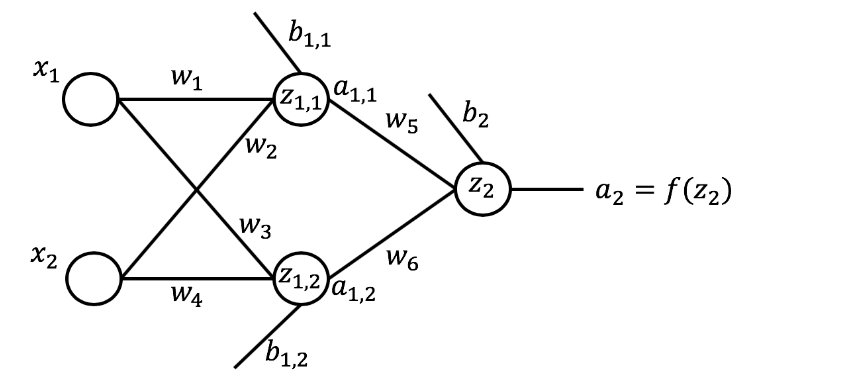

Let's start by randomly initializing the weights and the biases in the network. We have 6 weights and 3 biases, one for each node in the hidden layer as well as for each node in the output layer.

In [ ]:
import numpy as np # import Numpy library to generate

weights = np.around(np.random.uniform(size=6), decimals=2) # initialize the weights
biases = np.around(np.random.uniform(size=3), decimals=2) # initialize the biases

Let's print the weights and biases for sanity check.

In [ ]:
print(weights)
print(biases)

[0.39 0.01 0.85 0.14 0.56 0.9 ]
[0.07 0.28 0.85]


Now that we have the weights and the biases defined for the network, let's compute the output for a given input,  𝑥1
  and  𝑥2
 .

In [ ]:
x_1 = 0.5 # input 1
x_2 = 0.85 # input 2

print('x1 is {} and x2 is {}'.format(x_1, x_2))

x1 is 0.5 and x2 is 0.85


Let's start by computing the wighted sum of the inputs,  𝑧1,1
 , at the first node of the hidden layer.

In [ ]:
z_11 = x_1 * weights[0] + x_2 * weights[1] + biases[0]

print('The weighted sum of the inputs at the first node in the hidden layer is {}'.format(z_11))
# print(z_11)

The weighted sum of the inputs at the first node in the hidden layer is 0.2735


Next, let's compute the weighted sum of the inputs,  𝑧1,2
 , at the second node of the hidden layer. Assign the value to z_12.

In [ ]:
# The correct answer is:
z_12 = x_1 * weights[2] + x_2 * weights[3] + biases[1]
print(z_12)


0.8240000000000001


Print the weighted sum.

In [ ]:
print('The weighted sum of the inputs at the second node in the hidden layer is {}'.format(np.around(z_12, decimals=4)))

The weighted sum of the inputs at the second node in the hidden layer is 0.824



Next, assuming a sigmoid activation function, let's compute the activation of the first node,  𝑎1,1
 , in the hidden layer

In [ ]:
a_11 = 1.0 / (1.0 + np.exp(-z_11))

print('The activation of the first node in the hidden layer is {}'.format(np.around(a_11, decimals=4)))

The activation of the first node in the hidden layer is 0.568


Let's also compute the activation of the second node,  𝑎1,2
 , in the hidden layer. Assign the value to a_12.

In [ ]:
#  The correct answer is:
a_12 = 1.0 / (1.0 + np.exp(-z_12))
print(a_12)


0.6950847687708052


Print the activation of the second node.

In [ ]:
print('The activation of the second node in the hidden layer is {}'.format(np.around(a_12, decimals=4)))

The activation of the second node in the hidden layer is 0.6951


Now these activations will serve as the inputs to the output layer. So, let's compute the weighted sum of these inputs to the node in the output layer. Assign the value to z_2.

In [ ]:
#  The correct answer is:
z_2 = a_11 * weights[4] + a_12 * weights[5] + biases[2]
print(z_2)


1.7936293823599554


Print the weighted sum of the inputs at the node in the output layer.

In [ ]:
print('The weighted sum of the inputs at the node in the output layer is {}'.format(np.around(z_2, decimals=4)))

The weighted sum of the inputs at the node in the output layer is 1.7936


Finally, let's compute the output of the network as the activation of the node in the output layer. Assign the value to a_2.

In [ ]:
#  The correct answer is:
a_2 = 1.0 / (1.0 + np.exp(-z_2))
print(a_2)

0.8573716732217572


Print the activation of the node in the output layer which is equivalent to the prediction made by the network.

In [ ]:
print('The output of the network for x1 = 0.5 and x2 = 0.85 is {}'.format(np.around(a_2, decimals=4)))

The output of the network for x1 = 0.5 and x2 = 0.85 is 0.8574


*  Obviously, neural networks for real problems are composed of many hidden layers and many more nodes in each layer. So, we can't continue making predictions using this very inefficient approach of computing the weighted sum at each node and the activation of each node manually.

*  In order to code an automatic way of making predictions, let's generalize our network. A general network would take  𝑛
  inputs, would have many hidden layers, each hidden layer having  𝑚
  nodes, and would have an output layer. Although the network is showing one hidden layer, but we will code the network to have many hidden layers. Similarly, although the network shows an output layer with one node, we will code the network to have more than one node in the output layer.

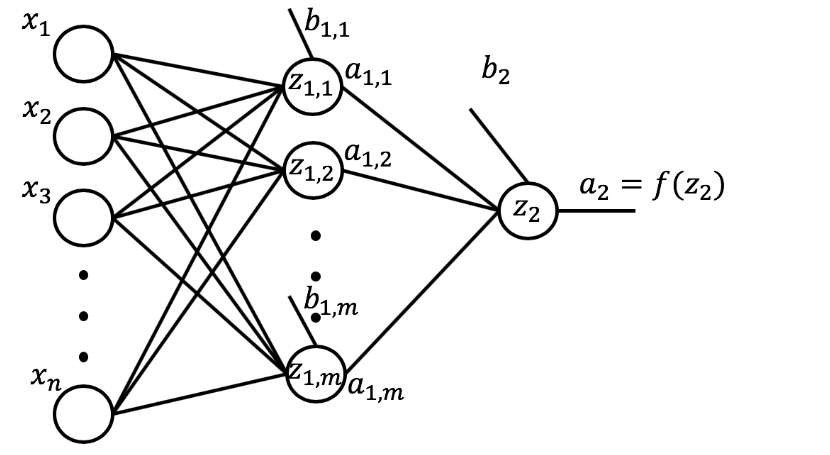

**Initialize a Network**

---



Let's start by formally defining the structure of the network

In [ ]:
n = 2 # number of inputs
num_hidden_layers = 2 # number of hidden layers
m = [2, 2] # number of nodes in each hidden layer
num_nodes_output = 1  # number of nodes in the output layer

Now that we defined the structure of the network, let's go ahead and inititailize the weights and the biases in the network to random numbers. In order to be able to initialize the weights and the biases to random numbers, we will need to import the Numpy library.

In [ ]:
import numpy as np # import the Numpy library

num_nodes_previous = n # number of nodes in the previous layer

network = {} # initialize network an an empty dictionary

# loop through each layer and randomly initialize the weights and biases associated with each node
# notice how we are adding 1 to the number of hidden layers in order to include the output layer
for layer in range(num_hidden_layers + 1):

    # determine name of layer
    if layer == num_hidden_layers:
        layer_name = 'output'
        num_nodes = num_nodes_output
    else:
        layer_name = 'layer_{}'.format(layer + 1)
        num_nodes = m[layer]

    # initialize weights and biases associated with each node in the current layer
    network[layer_name] = {}
    for node in range(num_nodes):
        node_name = 'node_{}'.format(node+1)
        network[layer_name][node_name] = {
            'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
            'bias': np.around(np.random.uniform(size=1), decimals=2),
        }

    num_nodes_previous = num_nodes

print(network) # print network

{'layer_1': {'node_1': {'weights': array([0.2 , 0.46]), 'bias': array([0.96])}, 'node_2': {'weights': array([0.77, 0.95]), 'bias': array([0.71])}}, 'layer_2': {'node_1': {'weights': array([0.88, 0.45]), 'bias': array([0.3])}, 'node_2': {'weights': array([0.72, 0.6 ]), 'bias': array([0.65])}}, 'output': {'node_1': {'weights': array([0.8 , 0.98]), 'bias': array([0.29])}}}


So now with the above code, we are able to initialize the weights and the biases pertaining to any network of any number of hidden layers and number of nodes in each layer. But let's put this code in a function so that we are able to repetitively execute all this code whenever we want to construct a neural network

In [ ]:
def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):

    num_nodes_previous = num_inputs # number of nodes in the previous layer

    network = {}

    # loop through each layer and randomly initialize the weights and biases associated with each layer
    for layer in range(num_hidden_layers + 1):

        if layer == num_hidden_layers:
            layer_name = 'output' # name last layer in the network output
            num_nodes = num_nodes_output
        else:
            layer_name = 'layer_{}'.format(layer + 1) # otherwise give the layer a number
            num_nodes = num_nodes_hidden[layer]

        # initialize weights and bias for each node
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2),
            }

        num_nodes_previous = num_nodes

    return network # return the network

**Use the initialize_network function to create a network that:**
1. takes 5 inputs
2. has three hidden layers
3. has 3 nodes in the first layer, 2 nodes in the second layer, and 3 nodes in the third layer
4. has 1 node in the output layer

**Call the network small_network.**

In [ ]:
#  The correct answer is:
small_network = initialize_network(5, 3, [3, 2, 3], 1)
print(small_network)

{'layer_1': {'node_1': {'weights': array([0.84, 0.61, 0.  , 0.35, 0.38]), 'bias': array([0.48])}, 'node_2': {'weights': array([0.96, 0.94, 0.3 , 0.67, 0.35]), 'bias': array([0.73])}, 'node_3': {'weights': array([0.79, 0.62, 0.39, 0.99, 0.45]), 'bias': array([0.49])}}, 'layer_2': {'node_1': {'weights': array([0.98, 0.61, 0.31]), 'bias': array([0.35])}, 'node_2': {'weights': array([0.86, 0.29, 0.08]), 'bias': array([0.15])}}, 'layer_3': {'node_1': {'weights': array([0.17, 0.16]), 'bias': array([0.25])}, 'node_2': {'weights': array([0.63, 0.79]), 'bias': array([0.16])}, 'node_3': {'weights': array([0.78, 0.63]), 'bias': array([0.79])}}, 'output': {'node_1': {'weights': array([0.09, 0.8 , 0.65]), 'bias': array([0.41])}}}


**Compute Weighted Sum at Each Node**

---



The weighted sum at each node is computed as the dot product of the inputs and the weights plus the bias. So let's create a function called compute_weighted_sum that does just that.

In [ ]:
def compute_weighted_sum(inputs, weights, bias):
    return np.sum(inputs * weights) + bias

Let's generate 5 inputs that we can feed to small_network.

In [ ]:
from random import seed
import numpy as np

np.random.seed(12)
inputs = np.around(np.random.uniform(size=5), decimals=2)

print('The inputs to the network are {}'.format(inputs))

The inputs to the network are [0.15 0.74 0.26 0.53 0.01]


Use the compute_weighted_sum function to compute the weighted sum at the first node in the first hidden layer.

In [ ]:
#  The correct answer is:
node_weights = small_network['layer_1']['node_1']['weights']
node_bias = small_network['layer_1']['node_1']['bias']

weighted_sum = compute_weighted_sum(inputs, node_weights, node_bias)
print('The weighted sum at the first node in the hidden layer is {}'.format(np.around(weighted_sum[0], decimals=4)))


The weighted sum at the first node in the hidden layer is 1.2467


**Compute Node Activation**

---

*  
Recall that the output of each node is simply a non-linear tranformation of the weighted sum. We use activation functions for this mapping. Let's use the sigmoid function as the activation function here. So let's define a function that takes a weighted sum as input and returns the non-linear transformation of the input using the sigmoid function.

In [ ]:
def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(-1 * weighted_sum))

Use the node_activation function to compute the output of the first node in the first hidden layer.

In [ ]:
#  The correct answer is:
node_output  = node_activation(compute_weighted_sum(inputs, node_weights, node_bias))
print('The output of the first node in the hidden layer is {}'.format(np.around(node_output[0], decimals=4)))


The output of the first node in the hidden layer is 0.7767


**Forward Propagation**

---
*  The final piece of building a neural network that can perform predictions is to put everything together. So let's create a function that applies the compute_weighted_sum and node_activation functions to each node in the network and propagates the data all the way to the output layer and outputs a prediction for each node in the output layer.


The way we are going to accomplish this is through the following procedure:

1. Start with the input layer as the input to the first hidden layer.
2. Compute the weighted sum at the nodes of the current layer.
3. Compute the output of the nodes of the current layer.
4. Set the output of the current layer to be the input to the next layer.
5. Move to the next layer in the network.
6. Repeat steps 2 - 4 until we compute the output of the output layer.

In [ ]:
def forward_propagate(network, inputs):

    layer_inputs = list(inputs) # start with the input layer as the input to the first hidden layer

    for layer in network:

        layer_data = network[layer]

        layer_outputs = []
        for layer_node in layer_data:

            node_data = layer_data[layer_node]

            # compute the weighted sum and the output of each node at the same time
            node_output = node_activation(compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias']))
            layer_outputs.append(np.around(node_output[0], decimals=4))

        if layer != 'output':
            print('The outputs of the nodes in hidden layer number {} is {}'.format(layer.split('_')[1], layer_outputs))

        layer_inputs = layer_outputs # set the output of this layer to be the input to next layer

    network_predictions = layer_outputs
    return network_predictions

Use the forward_propagate function to compute the prediction of our small network

In [ ]:
#  The correct answer is:
predictions = forward_propagate(small_network, inputs)
print('The predicted value by the network for the given input is {}'.format(np.around(predictions[0], decimals=4)))


The outputs of the nodes in hidden layer number 1 is [0.7767, 0.8814, 0.8453]
The outputs of the nodes in hidden layer number 2 is [0.8711, 0.7579]
The outputs of the nodes in hidden layer number 3 is [0.627, 0.7871, 0.8751]
The predicted value by the network for the given input is 0.8409


*  So we built the code to define a neural network. We can specify the number of inputs that a neural network can take, the number of hidden layers as well as the number of nodes in each hidden layer, and the number of nodes in the output layer.







*  We first use the initialize_network to create our neural network and define its weights and biases.

In [ ]:
my_network = initialize_network(5, 3, [2, 3, 2], 3)

print(my_network)

{'layer_1': {'node_1': {'weights': array([0.92, 0.9 , 0.03, 0.96, 0.14]), 'bias': array([0.28])}, 'node_2': {'weights': array([0.61, 0.94, 0.85, 0.  , 0.52]), 'bias': array([0.55])}}, 'layer_2': {'node_1': {'weights': array([0.49, 0.77]), 'bias': array([0.16])}, 'node_2': {'weights': array([0.76, 0.02]), 'bias': array([0.14])}, 'node_3': {'weights': array([0.12, 0.31]), 'bias': array([0.67])}}, 'layer_3': {'node_1': {'weights': array([0.47, 0.82, 0.29]), 'bias': array([0.73])}, 'node_2': {'weights': array([0.7 , 0.33, 0.33]), 'bias': array([0.98])}}, 'output': {'node_1': {'weights': array([0.62, 0.95]), 'bias': array([0.77])}, 'node_2': {'weights': array([0.83, 0.41]), 'bias': array([0.45])}, 'node_3': {'weights': array([0.4, 1. ]), 'bias': array([0.18])}}}


Then, for a given input,

In [ ]:
inputs = np.around(np.random.uniform(size=5), decimals=2)

we compute the network predictions.

In [ ]:
predictions = forward_propagate(my_network, inputs)
print('The predicted values by the network for the given input are {}'.format(predictions))

The outputs of the nodes in hidden layer number 1 is [0.8857, 0.8889]
The outputs of the nodes in hidden layer number 2 is [0.7822, 0.6965, 0.7411]
The outputs of the nodes in hidden layer number 3 is [0.868, 0.881]
The predicted values by the network for the given input are [0.8952, 0.8222, 0.8035]



> Creating different networks of different structures and enjoy making predictions using the forward_propagate function.

